# Titanic Survival Prediction
* Use the Titanic dataset to build a model that predicts whether a
passenger on the Titanic survived or not. This is a classic beginner
project with readily available data.
* The dataset typically used for this project contains information
about individual passengers, such as their age, gender, ticket
class, fare, cabin, and whether or not they survived.


---


Dataset: [dataset.csv](https://www.kaggle.com/datasets/yasserh/titanic-dataset)


---

# Importing Necessary Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Loading and Exploring the Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

path = '/content/drive/MyDrive/Data Science/CodSoft (Internship)/titanic_survival_prediction/dataset.csv'

df = pd.read_csv(path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
rows, cols = df.shape
print(f"Rows={rows} and Cols={cols}")

Rows=891 and Cols=12


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Data Pre-Processing

In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
df.drop(['Cabin', 'Name', 'Ticket'], axis=1, inplace=True)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [ ]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [ ]:
df.Sex.unique()

array(['male', 'female'], dtype=object)

In [ ]:
df['Sex'] = df['Sex'].replace({'male': 1, 'female': 0})
df.head()

<ipython-input-17-2c2e9de34d16>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sex'] = df['Sex'].replace({'male': 1, 'female': 0})


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,S
1,2,1,1,0,38.0,1,0,71.2833,C
2,3,1,3,0,26.0,0,0,7.9250,S
3,4,1,1,0,35.0,1,0,53.1000,S
4,5,0,3,1,35.0,0,0,8.0500,S


# Distribution of Passengers by Gender

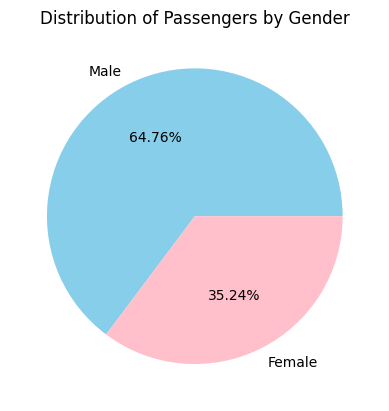

In [ ]:
sex_counts = df['Sex'].value_counts()
labels = ['Male', 'Female']

plt.pie(sex_counts, labels=labels, autopct='%1.2f%%', colors=['skyblue', 'pink'])
plt.title("Distribution of Passengers by Gender")
plt.show()

# Data Pre-Processing

In [ ]:
df.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [ ]:
df['Embarked'] = df['Embarked'].replace({'S': 1, 'C': 2, 'Q': 3})

<ipython-input-20-5ef5da5a3f84>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Embarked'] = df['Embarked'].replace({'S': 1, 'C': 2, 'Q': 3})


In [ ]:
df.Embarked.value_counts()

,count
Embarked,
1,646
2,168
3,77


In [ ]:
result = df.groupby('Pclass').agg(
    male=('Sex', lambda x: (x == 1).sum()),
    female=('Sex', lambda x: (x == 0).sum()),
    embarked=('Embarked', 'count')
).reset_index()

print(result)

   Pclass  male  female  embarked
0       1   122      94       216
1       2   108      76       184
2       3   347     144       491


# Gender Distribution by Ticket Class

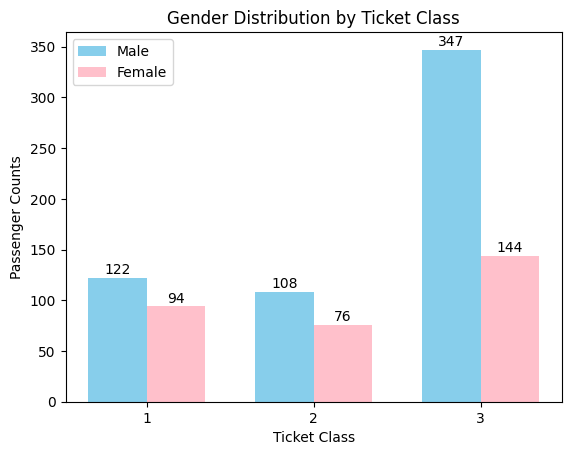

In [ ]:
bar_width = 0.35
x_indices = np.arange(len(result['Pclass']))

male_bars = plt.bar(x_indices, result['male'], width=bar_width, label='Male', color='skyblue')
female_bars = plt.bar(x_indices + bar_width, result['female'], width=bar_width, label='Female', color='pink')

plt.xlabel("Ticket Class")
plt.ylabel("Passenger Counts")
plt.title("Gender Distribution by Ticket Class")
plt.xticks(x_indices + bar_width / 2, result['Pclass'])
plt.legend()

for bars in [male_bars, female_bars]:
    for bar in bars:
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height() + 1,
            str(int(bar.get_height())),
            ha='center', va='bottom', color='black'
        )

plt.show()

# Correlation

In [ ]:
print(df.corr())

             PassengerId  Survived    Pclass       Sex       Age     SibSp  \
PassengerId     1.000000 -0.005007 -0.035144  0.042939  0.033207 -0.057527   
Survived       -0.005007  1.000000 -0.338481 -0.543351 -0.069809 -0.035322   
Pclass         -0.035144 -0.338481  1.000000  0.131900 -0.331339  0.083081   
Sex             0.042939 -0.543351  0.131900  1.000000  0.084153 -0.114631   
Age             0.033207 -0.069809 -0.331339  0.084153  1.000000 -0.232625   
SibSp          -0.057527 -0.035322  0.083081 -0.114631 -0.232625  1.000000   
Parch          -0.001652  0.081629  0.018443 -0.245489 -0.179191  0.414838   
Fare            0.012658  0.257307 -0.549500 -0.182333  0.091566  0.159651   
Embarked       -0.030467  0.106811  0.045702 -0.116569  0.007461 -0.059961   

                Parch      Fare  Embarked  
PassengerId -0.001652  0.012658 -0.030467  
Survived     0.081629  0.257307  0.106811  
Pclass       0.018443 -0.549500  0.045702  
Sex         -0.245489 -0.182333 -0.116569  

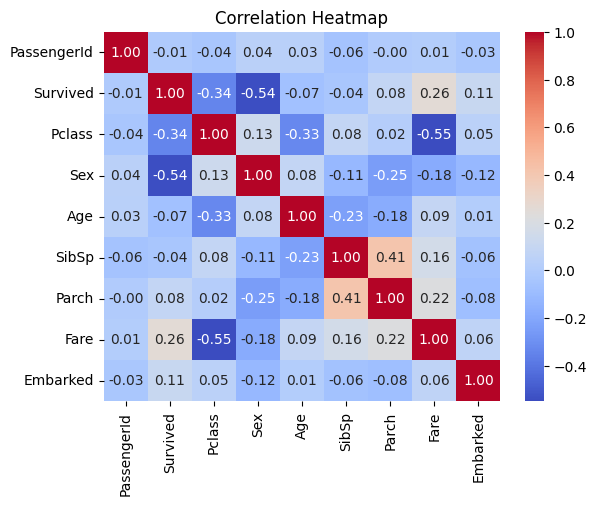

In [ ]:
corr_matrix = df.corr()

sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Feature Engineering

In [ ]:
result = df.groupby('Pclass').agg(
    male=('Sex', lambda x: (x == 1).sum()),
    male_survived=('Survived', lambda x: ((x == 1) & (df['Sex'] == 1)).sum()),
    female=('Sex', lambda x: (x == 0).sum()),
    female_survived=('Survived', lambda x: ((x == 1) & (df['Sex'] == 0)).sum()),
    embarked=('Embarked', 'count'),
    survived_embarked=('Survived', lambda x: (x == 1).sum())
).reset_index()

print(result)

   Pclass  male  male_survived  female  female_survived  embarked  \
0       1   122             45      94               91       216   
1       2   108             17      76               70       184   
2       3   347             47     144               72       491   

   survived_embarked  
0                136  
1                 87  
2                119  


# Survival Distribution by Gender

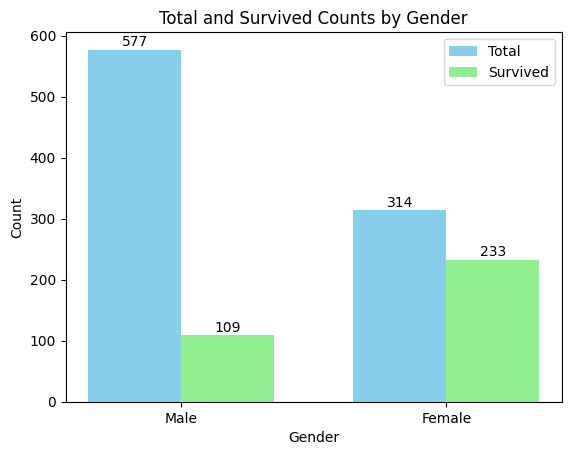

In [ ]:
summary = {
    'total_male': (df['Sex'] == 1).sum(),
    'male_survived': ((df['Sex'] == 1) & (df['Survived'] == 1)).sum(),
    'total_female': (df['Sex'] == 0).sum(),
    'female_survived': ((df['Sex'] == 0) & (df['Survived'] == 1)).sum()
}

categories = ['Male', 'Female']
total = [summary['total_male'], summary['total_female']]
survived = [summary['male_survived'], summary['female_survived']]
x_indices = np.arange(len(categories))
bar_width = 0.35

total_bars = plt.bar(x_indices, total, width=bar_width, label='Total', color='skyblue')
survived_bars = plt.bar(x_indices + bar_width, survived, width=bar_width, label='Survived', color='lightgreen')

plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Total and Survived Counts by Gender")
plt.xticks(x_indices + bar_width / 2, categories)
plt.legend()

for bars in [total_bars, survived_bars]:
    for bar in bars:
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height() + 1,
            str(int(bar.get_height())),
            ha='center', va='bottom', color='black'
        )

plt.show()

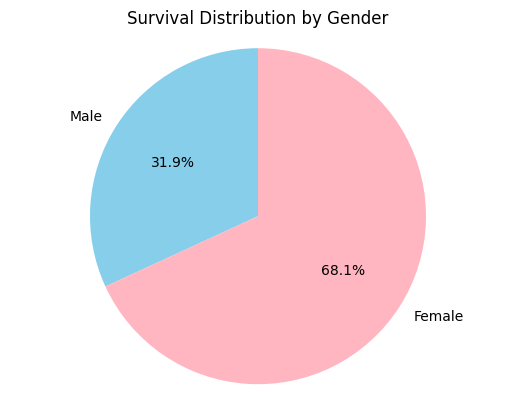

In [ ]:
labels = ['Male', 'Female']
sizes = [summary['male_survived'], summary['female_survived']]
colors = ['skyblue', 'lightpink']

plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)

plt.title("Survival Distribution by Gender")
plt.axis('equal')
plt.show()

# Survival by Passenger Class

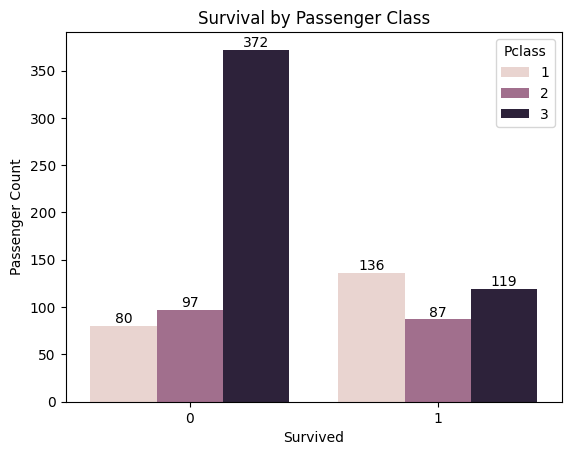

In [ ]:
ax = sns.countplot(x='Survived', hue='Pclass', data=df)

for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, color='black')

plt.title("Survival by Passenger Class")
plt.xlabel("Survived")
plt.ylabel("Passenger Count")
plt.legend(title="Pclass", loc="upper right")
plt.show()

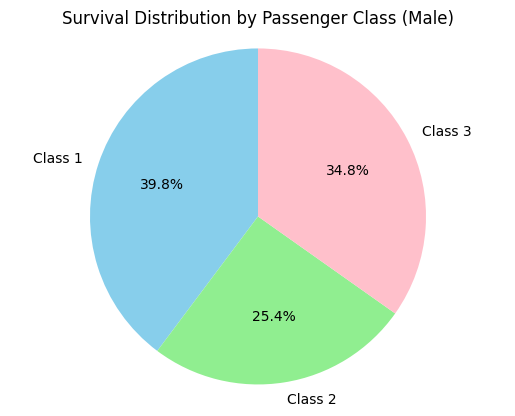

In [ ]:
survival_by_class = df.groupby(['Survived', 'Pclass']).size().reset_index(name='Count')

survivor_data = survival_by_class[survival_by_class['Survived'] == 1]
labels = ['Class 1', 'Class 2', 'Class 3']
sizes = survivor_data['Count']
colors = ['skyblue', 'lightgreen', 'pink']

plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title("Survival Distribution by Passenger Class (Male)")
plt.axis('equal')
plt.show()

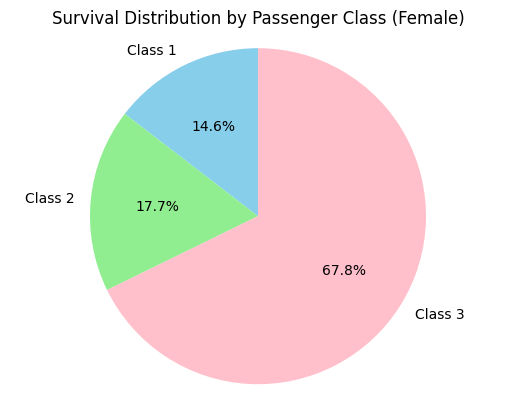

In [ ]:
survival_by_class = df.groupby(['Survived', 'Pclass']).size().reset_index(name='Count')

survivor_data = survival_by_class[survival_by_class['Survived'] == 0]
labels = ['Class 1', 'Class 2', 'Class 3']
sizes = survivor_data['Count']
colors = ['skyblue', 'lightgreen', 'pink']

plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title("Survival Distribution by Passenger Class (Female)")
plt.axis('equal')
plt.show()

# Age Distribution

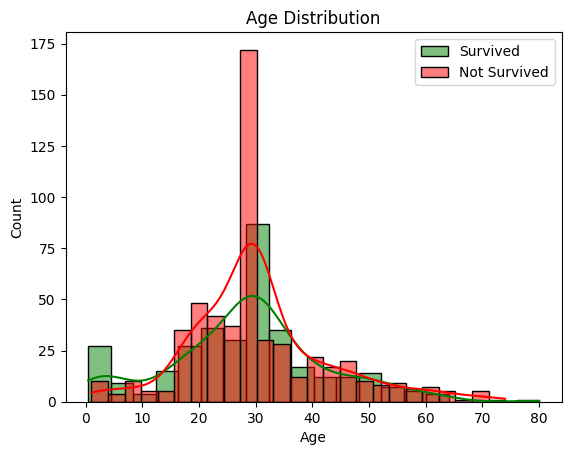

In [ ]:
sns.histplot(df[df['Survived'] == 1]['Age'], kde=True, color='green', label='Survived')
sns.histplot(df[df['Survived'] == 0]['Age'], kde=True, color='red', label='Not Survived')
plt.legend()
plt.title("Age Distribution")
plt.show()

# Feature Engineering

In [ ]:
df['FamilySize'] = df['SibSp'] + df['Parch']
df['IsAlone'] = (df['FamilySize'] == 0).astype(int)

In [ ]:
df.drop(['SibSp', 'Parch'], axis=1, inplace=True)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,IsAlone
0,1,0,3,1,22.0,7.2500,1,1,0
1,2,1,1,0,38.0,71.2833,2,1,0
2,3,1,3,0,26.0,7.9250,1,0,1
3,4,1,1,0,35.0,53.1000,1,1,0
4,5,0,3,1,35.0,8.0500,1,0,1


# Passenger Distribution: Alone & With Family

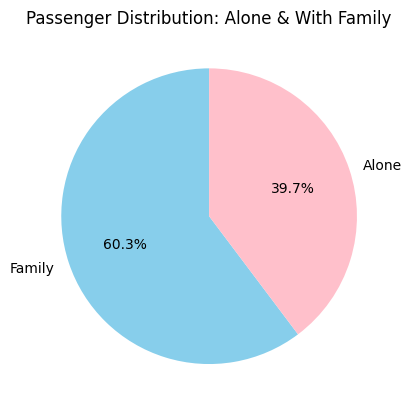

In [ ]:
alone_counts = df['IsAlone'].value_counts()

labels = ['Family', 'Alone']

plt.pie(
    alone_counts,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=['skyblue', 'pink']
)

plt.title("Passenger Distribution: Alone & With Family")
plt.show()

# Import Necessary Libraries for Model Building

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_curve, auc

# Logistic Regression

In [ ]:
X = df.drop(['Survived', 'IsAlone'], axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train, y_train)

y_pred_logreg = logreg_model.predict(X_test)

print("Logistic Regression:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_logreg) * 100:.2f}%")
print(f"Precision: {precision_score(y_test, y_pred_logreg) * 100:.2f}%")
print(f"Recall: {recall_score(y_test, y_pred_logreg) * 100:.2f}%")
print(f"F1-Score: {f1_score(y_test, y_pred_logreg) * 100:.2f}%")

Logistic Regression:
Accuracy: 81.01%
Precision: 79.41%
Recall: 72.97%
F1-Score: 76.06%


# Random Forest Classifier

In [ ]:
X = df.drop(['Survived', 'IsAlone'], axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("Random Forest Classifier:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf) * 100:.2f}%")
print(f"Precision: {precision_score(y_test, y_pred_rf) * 100:.2f}%")
print(f"Recall: {recall_score(y_test, y_pred_rf) * 100:.2f}%")
print(f"F1-Score: {f1_score(y_test, y_pred_rf) * 100:.2f}%")

Random Forest Classifier:
Accuracy: 83.80%
Precision: 82.61%
Recall: 77.03%
F1-Score: 79.72%


# ROC Curve Comparison

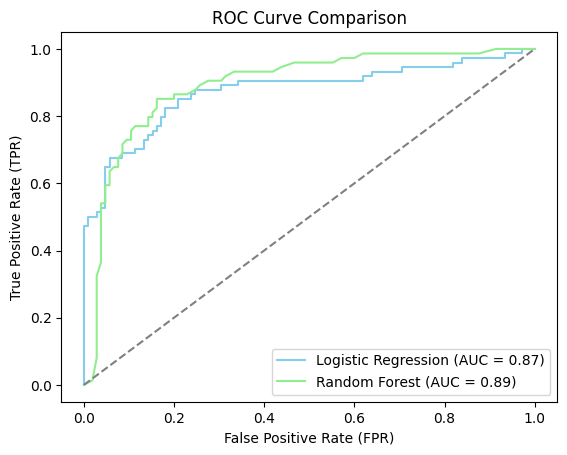

In [ ]:
logreg_probs = logreg_model.predict_proba(X_test)[:, 1]
rf_probs = rf_model.predict_proba(X_test)[:, 1]

fpr_logreg, tpr_logreg, _ = roc_curve(y_test, logreg_probs)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)

auc_logreg = auc(fpr_logreg, tpr_logreg)
auc_rf = auc(fpr_rf, tpr_rf)

plt.plot(fpr_logreg, tpr_logreg, color='skyblue', label=f'Logistic Regression (AUC = {auc_logreg:.2f})')
plt.plot(fpr_rf, tpr_rf, color='lightgreen', label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')

plt.show()

# Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred_logreg = logreg_model.predict(X_test)
y_pred_rf_tuned = rf_model.predict(X_test)

logreg_cm = confusion_matrix(y_test, y_pred_logreg)
rf_cm = confusion_matrix(y_test, y_pred_rf_tuned)

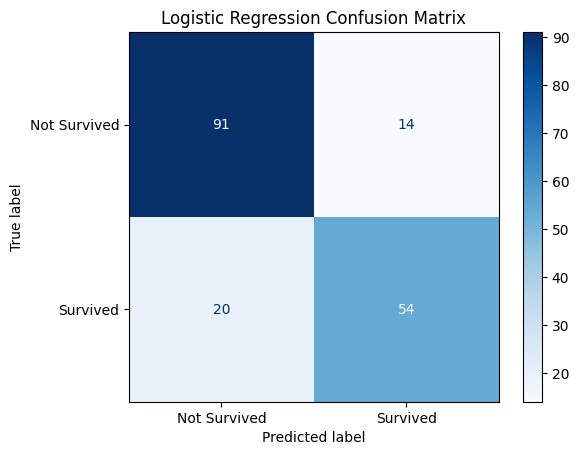

In [ ]:
logreg_disp = ConfusionMatrixDisplay(confusion_matrix=logreg_cm, display_labels=['Not Survived', 'Survived'])
logreg_disp.plot(cmap='Blues')
plt.title("Logistic Regression Confusion Matrix")
plt.show()

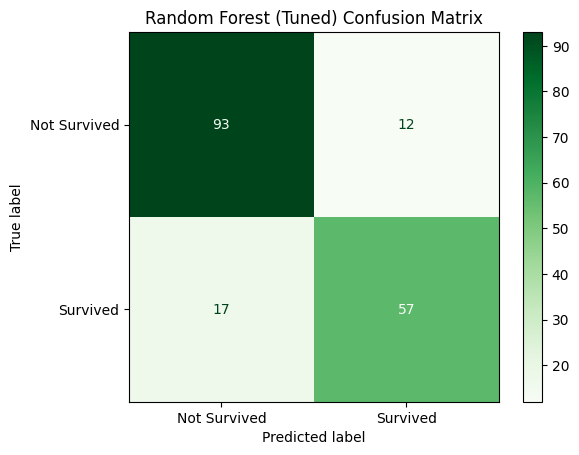

In [ ]:
rf_disp = ConfusionMatrixDisplay(confusion_matrix=rf_cm, display_labels=['Not Survived', 'Survived'])
rf_disp.plot(cmap='Greens')
plt.title("Random Forest (Tuned) Confusion Matrix")
plt.show()

# Model Perfomance Report

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

y_pred_logreg = logreg_model.predict(X_test)
y_pred_rf_tuned = rf_model.predict(X_test)

logreg_classification_report = classification_report(y_test, y_pred_logreg)
logreg_cm = confusion_matrix(y_test, y_pred_logreg)

rf_classification_report = classification_report(y_test, y_pred_rf_tuned)
rf_cm = confusion_matrix(y_test, y_pred_rf_tuned)

logreg_auc = auc(fpr_logreg, tpr_logreg)
rf_auc = auc(fpr_rf, tpr_rf)

report = f"""
==============================
     MODEL PERFORMANCE REPORT
==============================

1. LOGISTIC REGRESSION:
------------------------
   - AUC: {logreg_auc:.2f}

   - Classification Report:
     {logreg_classification_report}

   - Confusion Matrix:
     {logreg_cm}

-----------------------------------

2. RANDOM FOREST (TUNED):
-------------------------
   - AUC: {rf_auc:.2f}

   - Classification Report:
     {rf_classification_report}

   - Confusion Matrix:
     {rf_cm}

==============================
         END OF REPORT
==============================
"""

In [ ]:
print(report)


     MODEL PERFORMANCE REPORT

1. LOGISTIC REGRESSION:
------------------------
   - AUC: 0.87
   
   - Classification Report:
                   precision    recall  f1-score   support

           0       0.82      0.87      0.84       105
           1       0.79      0.73      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

   
   - Confusion Matrix:
     [[91 14]
 [20 54]]

-----------------------------------

2. RANDOM FOREST (TUNED):
-------------------------
   - AUC: 0.89
   
   - Classification Report:
                   precision    recall  f1-score   support

           0       0.85      0.89      0.87       105
           1       0.83      0.77      0.80        74

    accuracy                           0.84       179
   macro avg       0.84      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179

   
   - Confusion M

In [ ]:
with open("/content/drive/MyDrive/Data Science/CodSoft (Internship)/titanic_survival_prediction/model_perfomance_report.txt", "w") as file:
    file.write(report)

print("Report has been saved")

Report has been saved
